In [9]:
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt

#Desativa os warnings
import warnings
warnings.filterwarnings("ignore")

# Projeto 3 - Sinais e Sistemas em Tempo Discreto - 2023/01
# Identificação
## Nome: Samuel Andrade de Matos
## Matrícula: 17/0155943

# Funções utilizadas.

Coloque abaixo as funções desenvolvidas para este projeto.

In [10]:
#Código das funções utilizadas.

# Função que calcula a DFT de um sinal x
def dft(x):
    Xr = np.zeros(len(x))
    for i in range(len(x)):
        for j in range(len(x)):
            # Xr = somatório de x[n] * e^(-2j*pi*r*n/N) de n = 0 até N-1
            Xr[i] += x[j] * np.exp(-2j * np.pi * i * j / len(x))
    return Xr

# Função que calcula a DFT de 1s do sinal x
def dft_1s(x):
    X = x[:8192]
    return dft(X)

# Função que retira as amostra de amplitude menor que 200
def nonzeros(x):
    y = []
    for i in range(len(x)):
        #Se a amplitude da amostra i for maior que 200 armaena a amostra
        if np.abs(x[i]) > 200:
            #Como cada amostra i é = 1hz, então ao armazenar i se tem a frequência
            y.append((x[i],i))
    return y

# Função que dada uma frequência de coluna (maior que 1000hz) e retorna a coluna correspondente
def coluna_frequencia(x):
    if x >= 1204 and x <= 1214:
        return 1
    elif x >= 1331 and x <= 1341:
        return 2
    elif x >= 1472 and x <= 1482:
        return 3

# Função que dada uma frequência de linha (menor que 1000hz) e retorna a linha correspondente
def linha_frequencia(x):
    if x >= 692 and x <= 702:
        return 1
    elif x >= 765 and x <= 775:
        return 2
    elif x >= 847 and x <= 857:
        return 3
    elif x >= 935 and x <= 945:
        return 4

# Função que dado um sinal x, retorna o número digitado
def numero_digitado(x):
    y = []
    colunm = 0
    line = 0
    high = 0
    low = 0
    N = len(x)
    A = int(N/8192)
    freq = []
    l = ""

    #Calcula a DFT do sinal de 8192 em 8192 amostras, ou seja de 1s em 1s
    for i in range(A):
        minX = i * 8192
        maxX = (i + 1) * 8192
        k = sp.fft.fft(x[minX:maxX])
        k = nonzeros(k)
        y.append(k[:6])    

    #Armazena a maior frenquência e menor frequência de cada 1s do sinal
    for i in range(len(y)):
        for j in range(len(y[i])):
            p, q = y[i][j]
            if q < 1000:
                if q > low:
                    low = q
            else:
                if q > high:
                    high = q
        freq.append((low, high))
        low = 0
        high = 0

    #Converte os pares de frequência no número correspondente
    for i in range(len(freq)):
        p, q = freq[i]

        colunm = coluna_frequencia(q)
        line = linha_frequencia(p)        

        if colunm != 0  and line != 0:

            match (line, colunm):
                case (1,1):
                    l += "1"
                case (1,2):
                    l += "2"
                case (1,3):
                    l += "3"
                case (2,1):
                    l += "4"
                case (2,2):
                    l += "5"
                case (2,3):
                    l += "6"
                case (3,1):
                    l += "7"
                case (3,2):
                    l += "8"
                case (3,3):
                    l += "9"
                case (4,2):
                    l += "0"
                case _:
                    l += ""
        
        colunm = 0
        line = 0
    
    #Retorna o número encontrado
    return l

# Gera o seguinte rect:
#   1.0 , de 0 a t0 e de n0 - t0 a n0
#   0.5 , em t0 e n0 - t0
#   0.0 , caso contrário
def rect(t0, n0):
    x = np.zeros(n0)
    for i in range(n0):
        if i in range(0,t0) or i in range(n0 - t0 + 1, n0):
            x[i] = 1
        elif i in (t0,n0 - t0):
            x[i] = 0.5
        else:
            x[i] = 0

    return x

#Gera um filtro passa-baixa com frequência de corte fc = N/16
def H1(N):
    fc = N/16
    h = np.zeros(N)
    for i in range(N):
        if i <= fc or i >= N - fc:
            h[i] = 1
    return h

# Questão 1

Considere um sinal $x\left(t\right) = 8 \cdot \text{ret}\left(t\right)$, onde:

$$ \begin{align}
	\text{ret}\left(x\right) = \begin{cases}
                               0 & \text{se} ~~ \left|x\right| > \frac{1}{2} \\
															 \frac{1}{2} & \text{se} ~~ \left|x\right| = \frac{1}{2} \\
															 1 & \text{se} ~~ \left|x\right| < \frac{1}{2} \\
                             \end{cases}
\end{align}                             
$$

Considere que o sinal será amostrado a uma taxa $T = \frac{1}{8}$ s, e que queremos uma resolução na frequência de $f_0 = \frac{1}{4}$ Hz. 



## Questão 1a (1.0 ponto)

Obtenha o sinal $x\left[n\right]$, como uma amostragem de $x\left(t\right)$ .

In [11]:
#Resposta da questão 1a
T = 1/8
f0 = 1/4
t0 = int(1/f0)
n0 = int(t0 / T)
xn = rect(t0, n0)
xn

array([1. , 1. , 1. , 1. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0.5, 1. , 1. , 1. ])

## Questão 1b (1.0 ponto)

Compare a transformada de Fourier real do sinal $x\left(t\right)$ com a Transformada Discreta de Fourier obtida a partir de $x\left[n\right]$ . 

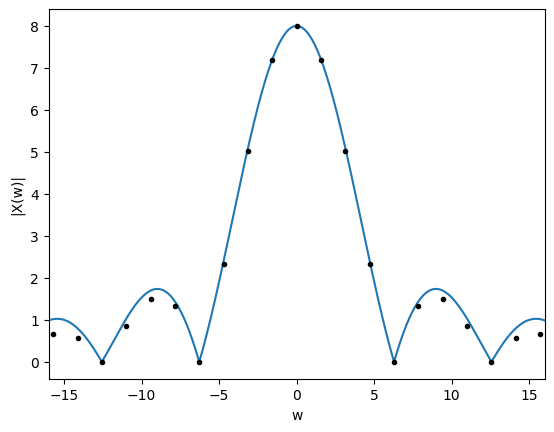

In [12]:
#Resposta da questão 1b
w = np.linspace(-np.pi/T, np.pi/T, 1000, endpoint=False)
Xw = 8 * np.sinc(w/(2*np.pi))
Xk = sp.fft.fftshift(dft(xn))

r = np.linspace(-n0/2, n0/2,32, endpoint=False)
wr = r * 2 * np.pi / t0

a = plt.figure()
plt.plot(w,np.abs(Xw))
plt.plot(wr,np.abs(Xk),'k.')
plt.xlim(-n0/2,n0/2)
plt.xlabel('w')
plt.ylabel('|X(w)|')
plt.show()


# Questão 2

Considere um sinal $x\left[n\right]$ com $N = 256$ amostras, onde: 
$$
\begin{align}
	x\left[n\right] = \begin{cases}
                               1 & \text{se} ~~ n < 64 \\
															 0 & \text{se} ~~ n \geq 64 \\															 
                             \end{cases}
\end{align}
$$

Considere agora um filtro passa-baixas ideal $H_1$ com frequência de corte normalizada igual a $\frac{1}{16}$.

## Questão 2a (1.0  ponto)

Filtre o sinal $x\left[n\right]$ com o filtro $H_1$, obtendo o sinal $y\left[n\right]$. Compare o sinal original $x\left[n\right]$ com o sinal obtido $y\left[n\right]$. 

Text(0.5, 0, 'n')

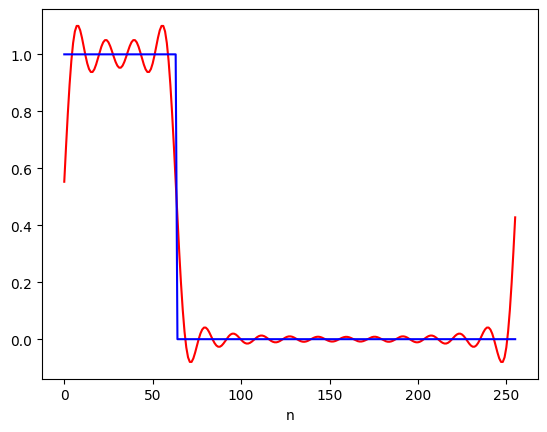

In [13]:
#Resposta da questão 2a
xn = np.zeros(256)

for i in range(256):
    if i in range(0,64):
        xn[i] = 1
    else:
        xn[i] = 0

#FFT de xn
Xk = sp.fft.fft(xn)
#H1
Hk = H1(256)
#Yk
Yk = Xk * Hk
#y[n]
yn = sp.fft.ifft(Yk)


plt.figure()
plt.plot(yn, 'r')
plt.plot(xn, 'b')
plt.xlabel('n')



## Questão 2b (1.0 ponto)

Compare o espectro do sinal $x\left[n\right]$ com o espectro do sinal $y\left[n\right]$. 

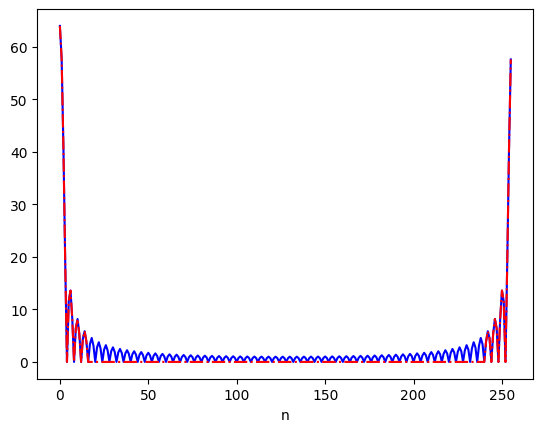

In [14]:
#Resposta da questão 2b
Xs = np.abs(Xk)
Ys = np.abs(Yk)
plt.figure()
plt.plot(Xs, 'b')
plt.plot(Ys, 'r-.')
plt.xlabel('n')
plt.show()


## Questão 2c (1.0  ponto)

Aplique o filtro $H_1$ no sinal contido no arquivo "noisy_ecg2.mat". Plote o sinal original e o sinal filtrado, bem como seus espectros.


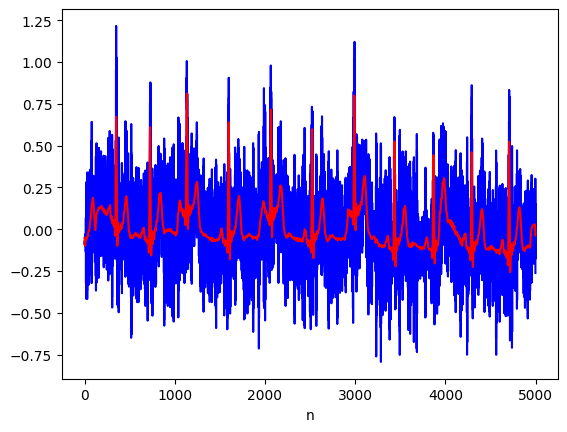

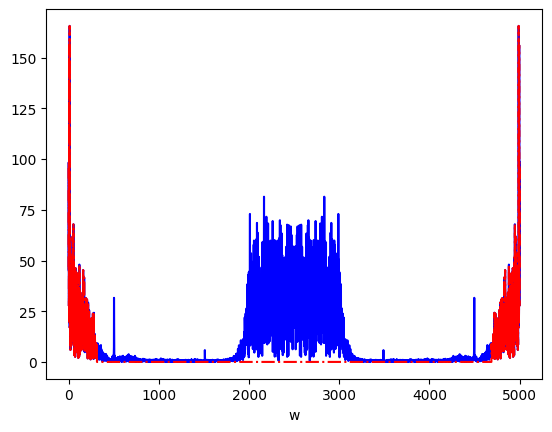

In [15]:
#Resposta da questão 2c

sinal = sp.io.loadmat('noisy_ecg_data_2.mat')['noisy_ecg2'].ravel()

Xk = sp.fft.fft(sinal)
Hk = H1(len(Xk))
Yk = Xk * Hk
yn = sp.fft.ifft(Yk)

plt.figure()
plt.plot(sinal, 'b')
plt.plot(yn, 'r')
plt.xlabel('n')
plt.show()

plt.figure()
plt.plot(np.abs(Xk), 'b')
plt.plot(np.abs(Yk), 'r-.')
plt.xlabel('w')
plt.show()

# Questão 3 (5.0 pontos)

O teclado de um touch-fone usa sinais de diferentes frequências para especificar quais botões foram pressionados. O teclado tem 12 botões, em um arranjo de quatro linhas e três colunas. Quando um botão é pressionado um sinal é gerado pela soma de dois tons senoidais com frequências diferentes. A frequência mais alta indica a coluna da tecla pressionada, enquanto a menor frequência indica a linha da tecla pressionada. As frequências são geradas de acordo com a tabela:

| | | Coluna | |
| :-: | :-: | :-: | :-: |
| Linha | 1209 Hz | 1336 Hz | 1477 Hz |
| 697 Hz | 1 | 2 | 3 |
| 770 Hz | 4 | 5 | 6 |
| 852 Hz | 7 | 8 | 9 |
| 940 Hz | | 0 | |

A frequência de amostragem é de 8192 Hz, e o som de cada tecla dura um segundo. Escreva um programa que decodifique, de forma automática, um sinal composto por um número de telefone gerado com essas características. Teste o seu programa com os sinais encontrados no arquivo "touch_fone.mat".


Numéro sinal 1: 31075580
Numéro sinal 2: 911
Numéro sinal 3: 2446712


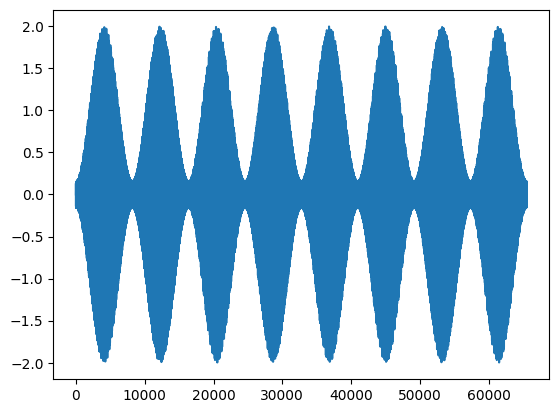

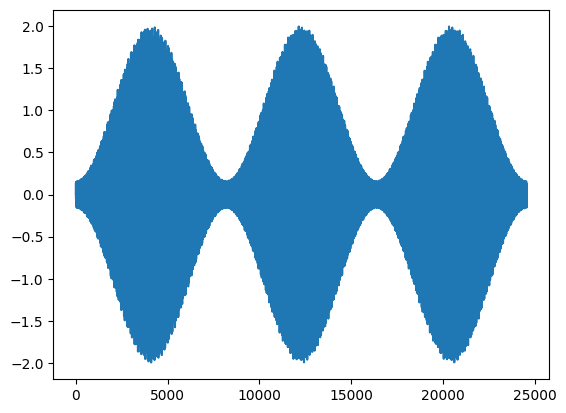

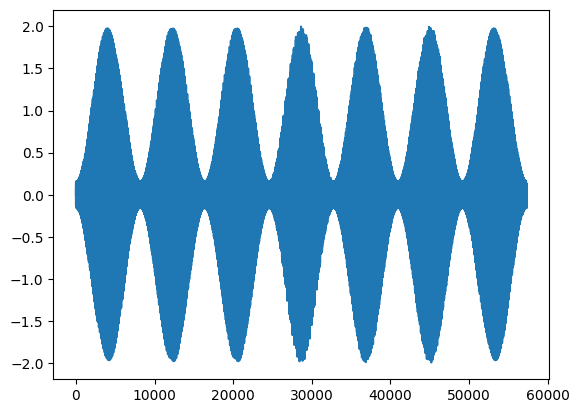

In [16]:
#Resposta da questão 3

sinal1 = sp.io.loadmat('touch_fone.mat')['x'].ravel()
sinal2 = sp.io.loadmat('touch_fone.mat')['y'].ravel()
sinal3 = sp.io.loadmat('touch_fone.mat')['z'].ravel()

x = numero_digitado(sinal1)
print(f'Numéro sinal 1: {x}')
y = numero_digitado(sinal2)
print(f'Numéro sinal 2: {y}')
z = numero_digitado(sinal3)
print(f'Numéro sinal 3: {z}')

plt.plot(sinal1)
plt.show()
plt.plot(sinal2)
plt.show()
plt.plot(sinal3)
plt.show()
